In [15]:
df_score1 = pd.DataFrame({
    "반":["A", "A", "B", "A", "B", "B", "B", "A", "B", "A"],
    "번호" : [1, 2, 1, 3, 2, 3, 4, 4, 5, 5],
    "국어" : [79, 67, 88, 68, 92, 54, 67, 88, 97, 85],
    "영어" : [55, 77, 44, 67, 86, 45, 78, 58, 90, 67],
    "수학" : [57, 45, 76, 68, 89, 67, 99, 78, 89, 90]
})
df_score1

,반,번호,국어,영어,수학
0,A,1,79,55,57
1,A,2,67,77,45
2,B,1,88,44,76
3,A,3,68,67,68
4,B,2,92,86,89
5,B,3,54,45,67
6,B,4,67,78,99
7,A,4,88,58,78
8,B,5,97,90,89
9,A,5,85,67,90


In [16]:
df = df_score1.set_index(["반", "번호"])
df

국어  영어  수학
반 번호            
A 1   79  55  57
  2   67  77  45
B 1   88  44  76
A 3   68  67  68
B 2   92  86  89
  3   54  45  67
  4   67  78  99
A 4   88  58  78
B 5   97  90  89
A 5   85  67  90

In [17]:
df = df.sort_index(level=0)
df

국어  영어  수학
반 번호            
A 1   79  55  57
  2   67  77  45
  3   68  67  68
  4   88  58  78
  5   85  67  90
B 1   88  44  76
  2   92  86  89
  3   54  45  67
  4   67  78  99
  5   97  90  89

In [18]:
df["평균"] = df.sum(axis=1)/3
df

국어  영어  수학         평균
반 번호                       
A 1   79  55  57  63.666667
  2   67  77  45  63.000000
  3   68  67  68  67.666667
  4   88  58  78  74.666667
  5   85  67  90  80.666667
B 1   88  44  76  69.333333
  2   92  86  89  89.000000
  3   54  45  67  55.333333
  4   67  78  99  81.333333
  5   97  90  89  92.000000

In [19]:
df = df.unstack("반")
df

국어      영어      수학             평균           
반    A   B   A   B   A   B          A          B
번호                                              
1   79  88  55  44  57  76  63.666667  69.333333
2   67  92  77  86  45  89  63.000000  89.000000
3   68  54  67  45  68  67  67.666667  55.333333
4   88  67  58  78  78  99  74.666667  81.333333
5   85  97  67  90  90  89  80.666667  92.000000

In [20]:
df.loc["평균"] = df.sum(axis=0)/5
df

국어          영어          수학               평균           
반      A     B     A     B     A     B          A          B
번호                                                          
1   79.0  88.0  55.0  44.0  57.0  76.0  63.666667  69.333333
2   67.0  92.0  77.0  86.0  45.0  89.0  63.000000  89.000000
3   68.0  54.0  67.0  45.0  68.0  67.0  67.666667  55.333333
4   88.0  67.0  58.0  78.0  78.0  99.0  74.666667  81.333333
5   85.0  97.0  67.0  90.0  90.0  89.0  80.666667  92.000000
평균  77.4  79.6  64.8  68.6  67.6  84.0  69.933333  77.400000

In [21]:
df = pd.DataFrame({
    'city': ['부산', '부산', '부산', '부산', '서울', '서울', '서울'],
    'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})

In [22]:
df

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4
4,서울,apple,150,5
5,서울,apple,200,6
6,서울,banana,400,7


In [23]:
df.groupby("city").mean()

,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [24]:
df.groupby(["city","fruits"]).mean()

price  quantity
city fruits                 
부산   apple   100.0       1.0
     banana  275.0       3.5
     orange  200.0       2.0
서울   apple   175.0       5.5
     banana  400.0       7.0

In [25]:
df.groupby(["city","fruits"]).mean().reset_index(drop=True)

,price,quantity
0,100.0,1.0
1,275.0,3.5
2,200.0,2.0
3,175.0,5.5
4,400.0,7.0


In [37]:
df.pivot_table(values=["price", "quantity"], index="city", aggfunc=["sum", "mean"]).iloc[:,[1,2]]

,sum,mean
,quantity,price
city,,
부산,10,212.5
서울,18,250.0


In [26]:
?df.pivot_table

In [38]:
tips = sns.load_dataset("tips")

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
sns.boxplot()

<AxesSubplot:xlabel='sex', ylabel='tip'>

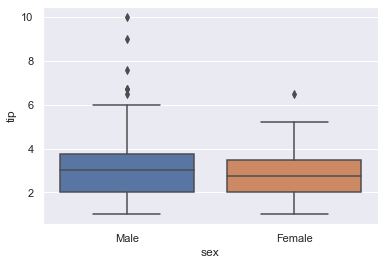

In [42]:
sns.boxplot(x="sex", y="tip", data=tips)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글이 깨지는 문제
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 한글 적용 후 기호가 미출력
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

{'whiskers': [<matplotlib.lines.Line2D at 0x205dda5a1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x205dda5a730>,
 'boxes': [<matplotlib.lines.Line2D at 0x205dda47f40>,
 'medians': [<matplotlib.lines.Line2D at 0x205dda5acd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x205dda5afa0>,
 'means': []}

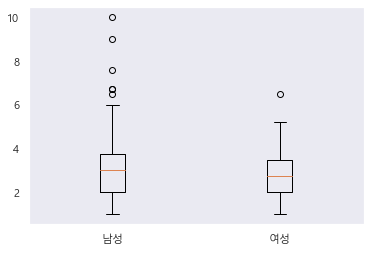

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.grid()
ax.boxplot([tips[tips["sex"]=="Male"]["tip"],
        tips[tips["sex"]=="Female"]["tip"]], labels=["남성","여성"])

In [48]:
bike = pd.read_csv("data/SeoulBikeData.csv")
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [51]:
# datetime으로 변경
bike["Date"] = pd.to_datetime(bike["Date"], format="%d/%m/%Y")

In [56]:
dday = pd.to_datetime("2022-6-24") - bike["Date"]
dday = dday.astype(str)
dday
dday_7 = dday.str.split(expand=True)[0].astype(int)
dday_7

def weekdays(x):
    if x%7 == 0: 
        return "금"
    elif x%7 == 1:
        return "토"
    elif x%7 == 2:
        return "일"
    elif x%7 == 3:
        return "월"
    elif x%7 == 4:
        return "화"
    elif x%7 == 5:
        return "수"
    elif x%7 == 6:
        return "목"
    
bike["weekdays"] = dday_7.apply(weekdays)
bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,금
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금


0       1666
1       1666
2       1666
3       1666
4       1666
        ... 
8755    1302
8756    1302
8757    1302
8758    1302
8759    1302
Name: 0, Length: 8760, dtype: int32

In [57]:
v1 = np.array([[1,2,3], [4,5,6]])
v2 = np.array([[1,2,3]])

In [58]:
v1+v2

array([[2, 4, 6],
       [5, 7, 9]])

In [59]:
v3 = np.array([[1, 1]])
v1 + v3

ValueError: operands could not be broadcast together with shapes (2,3) (1,2) 

In [60]:
v1.max()

6

In [62]:
text = '[특종]대한민국 통일됨(후후후)\n\n#조아 #아주 조아 #cheeze'

In [253]:
import re

result = re.findall("\w+", text)
result

"".join(result)

'특종대한민국통일됨후후후조아아주조아cheeze'

In [68]:
print(result)

None


In [102]:
crime_anal_raw = pd.read_csv("data/seoul/crime_in_seoul_include_gu.csv", index_col=0)
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,위도,경도
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563618,126.989587
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575538,126.984899
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554780,126.973497
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564902,126.966791
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571892,126.998936


In [100]:
crime_anal = pd.pivot_table(crime_anal_raw, index="구별", aggfunc=np.sum)

In [105]:
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,경도,살인 검거,살인 발생,위도,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,,,
강남구,349,449,18,21,254.144214,10,13,75.002887,1650,3850,3705,4284
강동구,123,156,8,6,127.126890,3,4,37.528673,789,2366,2248,2712
강북구,126,153,13,14,127.027339,8,7,37.637407,618,1434,2348,2649
강서구,191,262,13,13,126.849886,8,7,37.551347,1260,2096,2718,3207
관악구,221,320,14,12,126.951062,8,9,37.474588,827,2706,2642,3298


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글이 깨지는 문제
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 한글 적용 후 기호가 미출력
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

In [120]:
url = "https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=서울날씨# sm=top_hty&fbm=0&ie=utf8&query=서울날씨" 

In [121]:
header = {"User-Agent":"Mozilla/5.0"}
page = requests.get(url, headers=header)
page

<Response [200]>

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="서울날씨 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'서울날씨\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'서울날씨\'의 네이버 통합검색 결과입니다."> <title>서울날씨 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220602.css"> <link rel="stylesheet" type="text/css" 
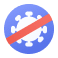
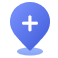
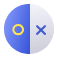
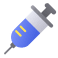

In [122]:
page.text

In [123]:
city = ["서울", "부산", "제주도", "광주", "대전", "경기도"]

In [124]:
soup = BeautifulSoup(page.text, "html.parser")

In [125]:
today = soup.find("div", "status_wrap").get_text()

In [126]:
today

' 오늘의 날씨    구름많음   현재 온도24.5°    어제보다 0.4° 높아요  구름많음   체감 26.5° 습도 81% 바람(남풍) 4.9m/s        미세먼지 좋음     초미세먼지 보통     자외선 높음     일몰 19:57     '

In [132]:
city = ["서울", "부산", "제주도", "광주", "대전", "경기도"]

header = {"User-Agent":"Mozilla/5.0"}

for weather in city:
    url_raw = "https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query={}날씨# sm=top_hty&fbm=0&ie=utf8&query={}날씨"
    url = url_raw.format(weather, weather)
    page = requests.get(url, headers=header)
    soup = BeautifulSoup(page.text, "html.parser")
    print(soup.find("div","status_wrap").get_text())
    print("-----------------------")

 오늘의 날씨    구름많음   현재 온도24.5°    어제보다 0.4° 높아요  구름많음   체감 26.5° 습도 80% 바람(남풍) 5.3m/s        미세먼지 좋음     초미세먼지 보통     자외선 높음     일몰 19:57     
-----------------------
 오늘의 날씨    흐림   현재 온도23.8°    어제보다 0.6° 높아요  흐림   체감 26.4° 습도 89% 바람(남서풍) 5.1m/s        미세먼지 보통     초미세먼지 보통     자외선 보통     일몰 19:42     
-----------------------
 오늘의 날씨    흐림   현재 온도27.6°    어제보다 1.6° 낮아요  흐림   체감 28.3° 습도 63% 바람(북서풍) 6.4m/s        미세먼지 좋음     초미세먼지 좋음     자외선 보통     일몰 19:47     
-----------------------
 오늘의 날씨    구름많음   현재 온도27.4°    어제보다 0.9° 높아요  구름많음   체감 28.9° 습도 73% 바람(서풍) 2.3m/s        미세먼지 좋음     초미세먼지 보통     자외선 높음     일몰 19:50     
-----------------------
 오늘의 날씨    흐림   현재 온도25.5°    어제보다 0.5° 높아요  흐림   체감 27.3° 습도 77% 바람(서풍) 3.4m/s        미세먼지 좋음     초미세먼지 좋음     자외선 매우높음     일몰 19:52     
-----------------------
 오늘의 날씨    흐림   현재 온도26.1°    어제보다 1.4° 높아요  흐림   체감 27.2° 습도 68% 바람(서풍) 5m/s        미세먼지 보통     초미세먼지 보통     자외선 높음     일몰 19:55     
-----------------------


In [136]:
import xml.etree.ElementTree as elemTree

In [137]:
str = """<?xml version="1.0"?>
<data>
    <country name="Liechtenstein">
        <rank>1</rank>
        <year>2008</year>
        <gdppc>141100</gdppc>
        <neighbor name="Austria" direction="E" />
        <neighbor name="Switzerland" direction="W"/>
    </country>
    <country name="Singapore">
        <rank>4</rank>
        <year>2011</year>
        <gdppc>59900</gdppc>
        <neighbor name="Malaysia" direction="N"/>
    </country>
    <country name="Panama">
        <rank>68</rank>
        <year>2011</year>
        <gdppc>13600</gdppc>
        <neighbor name="Costa Rica" direction="W"/>
        <neighbor name="Colombia" direction="E"/>
    </country>
</data>
"""

data = elemTree.fromstring(str)

In [138]:
data

<Element 'data' at 0x00000205DDF924A0>

In [146]:
print(data.find("country[1]").find("neighbor").attrib["name"])

Austria


In [147]:
print(data.find("country[3]").find("neighbor[1]").attrib["direction"])

W


In [158]:
for i in range(3):
    print(data.find("country[{}]".format(i+1)).attrib["name"], data.find("country[{}]".format(i+1)).find("gdppc").text)

Liechtenstein 141100
Singapore 59900
Panama 13600


In [169]:
for i in range(3):
    neighbor = data.find("country[{}]".format(i+1)).findall("./neighbor")
    print(data.find("country[{}]".format(i+1)).attrib["name"], end=" ")
    for j in neighbor:
        print(j.attrib["name"], end="")
    print()

Liechtenstein AustriaSwitzerland
Singapore Malaysia
Panama Costa RicaColombia
